<a href="https://colab.research.google.com/github/11Kclarke/MDM3_Project1_Quartix/blob/main/feature_proccessing_and_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [120]:
df=pd.read_pickle('gdrive/My Drive/Ai_Audio_Project/component_dataframe.pickle')
limitPer = len(df) * .90
df = df.dropna(thresh=limitPer, axis=1)

rows_with_nan = []

for index, row in df.iterrows():

    is_nan_series = row.isnull()

    if is_nan_series.any():

        rows_with_nan.append(index)

rows_with_nan

[1, 204, 230, 250, 261, 338, 380, 513, 580, 662, 722, 783, 951]

In [121]:
labeldf=pd.read_csv('gdrive/My Drive/Ai_Audio_Project/labels.csv')
df=df.drop(rows_with_nan)
labels=labeldf.values[df.index]
labels=labels[:,1]
labels=labels.astype("int")


In [115]:
df.to_csv("gdrive/My Drive/Ai_Audio_Project/SB_features_clean1051.csv")
df.shape

(1051, 304)

In [116]:
labeldf=pd.read_csv('gdrive/My Drive/Ai_Audio_Project/labels.csv')
labels=labeldf.loc[df.index]
labels.to_csv("gdrive/My Drive/Ai_Audio_Project/labels_SB_features_clean1051.csv")

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)


In [41]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
print(np.shape(df))
selectedfeatures=sel.fit_transform(df)
print(np.shape(selectedfeatures))
selectedfeatures

(1051, 304)
(1051, 22)


array([[8.14895434e-01, 9.41802879e+00, 1.33950562e+01, ...,
        5.95453505e-01, 1.81687201e-01, 8.60177601e-02],
       [2.99057932e+00, 2.74638025e+01, 3.91458036e+01, ...,
        3.58123397e-01, 1.11013422e-01, 5.31199927e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.80577067e-01, 9.20919157e-02, 5.06264893e-02],
       ...,
       [1.35176798e+01, 5.11917836e+01, 4.52642997e+01, ...,
        3.68302396e-01, 1.13736046e-01, 6.52782585e-02],
       [1.84486552e+01, 6.23905923e+01, 5.85347953e+01, ...,
        4.21798946e-01, 2.20806360e-01, 8.21775129e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.78171310e-01, 1.26540587e-01, 5.62074009e-02]])

In [108]:
selectedfeatures2=dict()
numberoffeatures=2

Text(0.5, 1.0, 'Best 2 SurfBoardFeatures: mutual_info_classif')

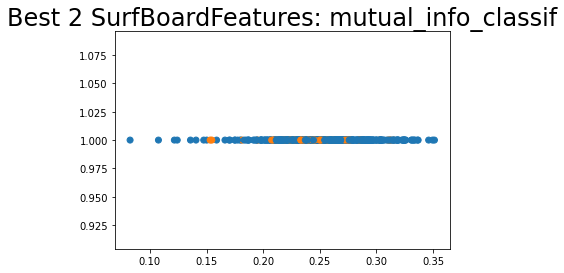

In [122]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


selectedfeatures2["mutual_info_classif"] = SelectKBest(mutual_info_classif, k=numberoffeatures).fit_transform(df, labels)
selectedfeatures2["mutual_info_classif"].shape
plt.scatter(
    selectedfeatures2["mutual_info_classif"][:, 0],
    selectedfeatures2["mutual_info_classif"][:, 1],
    c=[sns.color_palette()[x] for x in labels])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Best 2 SurfBoardFeatures: mutual_info_classif', fontsize=24)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [294] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Text(0.5, 1.0, 'Best 2 SurfBoardFeatures: f_classif')

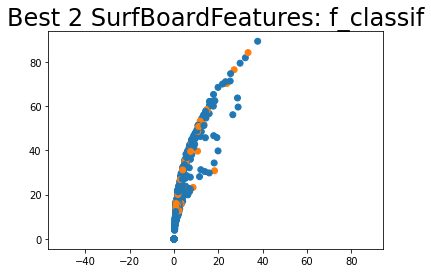

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


selectedfeatures2["f_classif"] = SelectKBest(f_classif, k=numberoffeatures).fit_transform(df, labels)


plt.scatter(
    selectedfeatures2["f_classif"][:, 0],
    selectedfeatures2["f_classif"][:, 1],
    c=[sns.color_palette()[x] for x in labels])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Best 2 SurfBoardFeatures: f_classif', fontsize=24)

Text(0.5, 1.0, 'Best 2 SurfBoardFeatures: chi2')

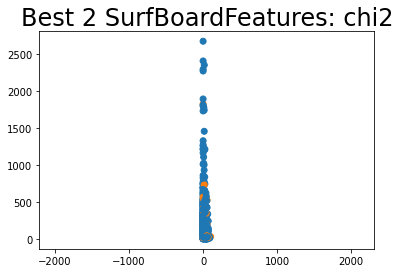

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
absdf=abs(df)

selectedfeatures2["chi2"] = SelectKBest(chi2, k=numberoffeatures).fit_transform(absdf, labels)

plt.scatter(
    selectedfeatures2["chi2"][:, 0],
    selectedfeatures2["chi2"][:, 1],
    c=[sns.color_palette()[x] for x in labels])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Best 2 SurfBoardFeatures: chi2', fontsize=24)


In [91]:
len(selectedfeatures2["chi2"])

1051

In [93]:
selectedfeatures2["combination"]=[]
for i in range(numberoffeatures):
  ithchi2 = selectedfeatures2["chi2"][:,i]
  ithmic = selectedfeatures2["mutual_info_classif"][:,i]
  ithf_classif = selectedfeatures2["f_classif"][:,i]
  print(len(ithf_classif))
  if ithchi2.all() == ithmic.all() == ithf_classif.all():
    selectedfeatures2["combination"].append(ithchi2)


1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051
1051


In [98]:
np.shape(selectedfeatures2["combination"])

(55, 1051)

In [100]:
selectedfeatures2["combination"]=np.array(selectedfeatures2["combination"]).T.tolist()

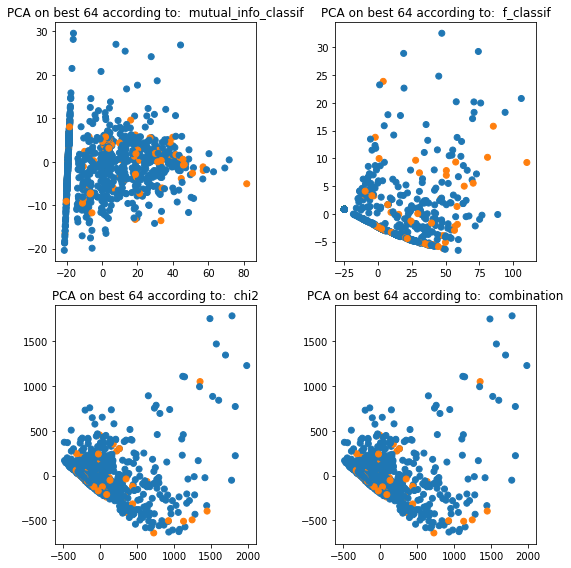

In [105]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
fig,axes=plt.subplots(2,2,figsize=(8,8))
pca = PCA(n_components=2)
n=0
for i in selectedfeatures2.keys():
  
  embedding=pca.fit_transform(selectedfeatures2[i])
  axes.flatten()[n].set_title("PCA on best 64 according to:  "+i)
  axes.flatten()[n].scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in labels])
  n+=1
fig.tight_layout()

In [133]:
from sklearn.preprocessing import MinMaxScaler
X=df
y=labels
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X= scaling.transform(df)
X.shape


(1051, 304)

In [131]:
labels.shape

(1051,)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

In [150]:
rfecv.cv_results_.keys()

dict_keys(['mean_test_score', 'std_test_score', 'split0_test_score', 'split1_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


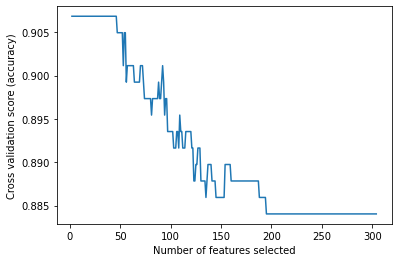

In [151]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    
    rfecv.cv_results_['split0_test_score'],
)
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


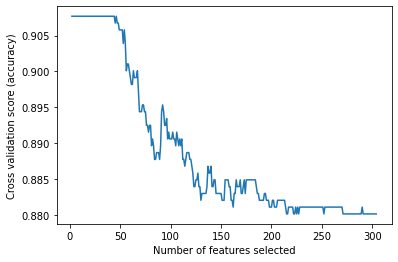

In [141]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    
)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


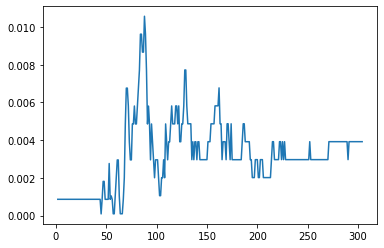

In [140]:
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.cv_results_["std_test_score"],
    
)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


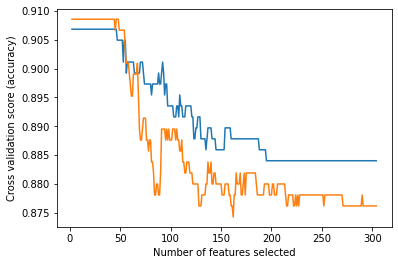

In [136]:

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
    
)
plt.show()

In [127]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X.shape)
X_new.shape

(1051, 304)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_base.py:99: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning,


(1051, 0)

In [128]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)

clf = clf.fit(X, y)

clf.feature_importances_



array([0.00197389, 0.00127075, 0.00136348, 0.00225421, 0.0025313 ,
       0.00126941, 0.00188571, 0.00086727, 0.00156885, 0.00163142,
       0.00285356, 0.00154786, 0.00203397, 0.00161396, 0.00163572,
       0.0020336 , 0.00219737, 0.0018798 , 0.00222663, 0.00388185,
       0.00197   , 0.00152884, 0.00197026, 0.00260601, 0.00186754,
       0.00235125, 0.002159  , 0.00181293, 0.0017399 , 0.00154306,
       0.00211948, 0.00106587, 0.00156249, 0.00236624, 0.00174229,
       0.00227296, 0.00208921, 0.00310006, 0.00223173, 0.00163346,
       0.00269316, 0.002755  , 0.00169847, 0.00188314, 0.0012931 ,
       0.00081263, 0.00319795, 0.00242216, 0.00205719, 0.00160024,
       0.00206285, 0.00145742, 0.00192123, 0.00293596, 0.00151449,
       0.0022983 , 0.00235569, 0.00156012, 0.00139507, 0.00205746,
       0.00191196, 0.00096465, 0.00189676, 0.00167477, 0.00331651,
       0.00265001, 0.00335002, 0.00188548, 0.00329226, 0.0023611 ,
       0.0025753 , 0.00378341, 0.00356241, 0.00366021, 0.00304

In [129]:
model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)

X_new.shape 

(1051, 143)